In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import requests
import json


In [2]:
df = pd.read_csv("filtered_movies.csv")

In [3]:
df.head()

,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,tmdb_id,og_language,budget,revenue,ratio,ROI,averageRating,numVotes,Unnamed: 18
0,7363,tt1179904,movie,Paranormal Activity,Paranormal Activity,0,2007,NaN,86,"Horror,Mystery",23827,en,230000,194183034,0.001184,844.274061,6.3,238846,Info says budget is $15k
1,4135,tt0390521,movie,Super Size Me,Super Size Me,0,2004,NaN,100,Documentary,9372,en,65000,28575078,0.002275,439.616585,7.2,108792,NaN
2,4907,tt2309260,movie,The Gallows,The Gallows,0,2015,NaN,81,"Horror,Mystery,Thriller",299245,en,100000,42664410,0.002344,426.644100,4.2,20611,NaN
3,8453,tt0876294,movie,Zombie Diaries,The Zombie Diaries,0,2006,NaN,85,"Horror,Sci-Fi",25035,en,9300,2000000,0.004650,215.053763,4.0,4755,NaN
4,9342,tt0907657,movie,Once,Once,0,2007,NaN,86,"Drama,Music,Romance",5723,en,160000,20710513,0.007726,129.440706,7.8,116662,NaN


## Budget and Revenue

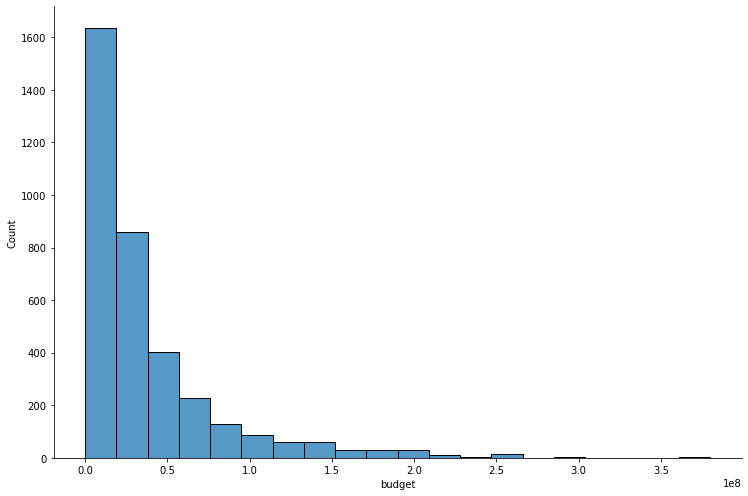

In [4]:
sns.displot(df, x="budget", bins=20, height=7, aspect=1.5)

plt.show()

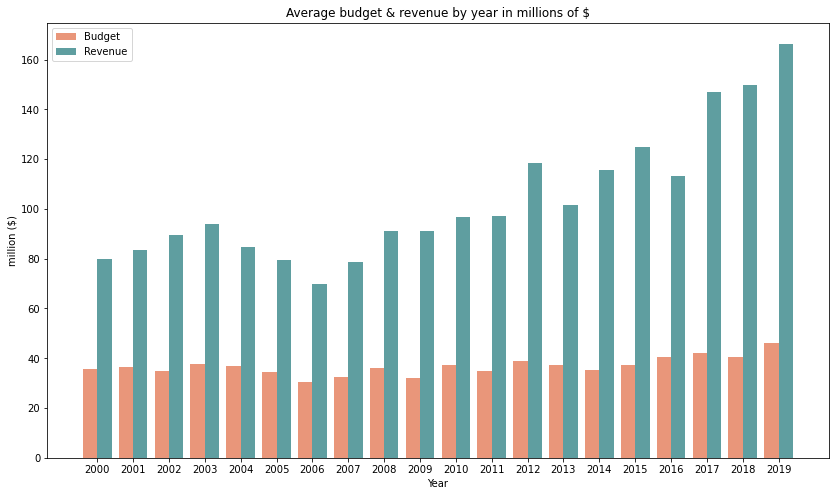

In [5]:
df_year_mean = df.groupby('startYear').mean()

f = plt.figure(figsize=(14, 8))

plt.bar(df_year_mean.index.astype('int64'), df_year_mean.budget / 1e6,
        color='darksalmon', width=-0.4, align='edge', label='Budget')
plt.bar(df_year_mean.index.astype('int64'), df_year_mean.revenue/ 1e6,
        color='cadetblue', width=0.4, align='edge', label='Revenue')

plt.xticks(ticks=df_year_mean.index.astype('int64'), labels=df_year_mean.index.astype('int64'))
plt.ticklabel_format(style='plain', useOffset=False, axis='y')



plt.xlabel('Year')
plt.ylabel('million ($)')
plt.title('Average budget & revenue by year in millions of $')

plt.legend()
plt.show()

In [52]:
outliers_removed = df[( np.abs(stats.zscore(df["budget"])) < 3 )  | ( np.abs(stats.zscore(df["revenue"])) < 3 )]

outliers_removed

,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,tmdb_id,og_language,budget,revenue,ratio,ROI,averageRating,numVotes,Unnamed: 18
0,7363,tt1179904,movie,Paranormal Activity,Paranormal Activity,0,2007,NaN,86,"Horror,Mystery",23827,en,230000,194183034,0.001184,844.274061,6.3,238846,Info says budget is $15k
1,4135,tt0390521,movie,Super Size Me,Super Size Me,0,2004,NaN,100,Documentary,9372,en,65000,28575078,0.002275,439.616585,7.2,108792,NaN
2,4907,tt2309260,movie,The Gallows,The Gallows,0,2015,NaN,81,"Horror,Mystery,Thriller",299245,en,100000,42664410,0.002344,426.644100,4.2,20611,NaN
3,8453,tt0876294,movie,Zombie Diaries,The Zombie Diaries,0,2006,NaN,85,"Horror,Sci-Fi",25035,en,9300,2000000,0.004650,215.053763,4.0,4755,NaN
4,9342,tt0907657,movie,Once,Once,0,2007,NaN,86,"Drama,Music,Romance",5723,en,160000,20710513,0.007726,129.440706,7.8,116662,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3582,10702,tt1935194,movie,Overdrive,Overdrive,0,2017,NaN,93,"Action,Adventure,Crime",404733,en,28210303,7793,3619.954190,0.000276,5.3,14982,NaN
3583,414,tt1376213,movie,The Adventurer: The Curse of the Midas Box,The Adventurer: The Curse of the Midas Box,0,2013,NaN,100,"Adventure,Family,Fantasy",227707,en,25000000,6399,3906.860447,0.000256,5.4,6779,NaN
3584,9979,tt7869070,movie,The Fanatic,The Fanatic,0,2019,NaN,88,"Crime,Thriller",509853,en,18000000,3153,5708.848716,0.000175,4.2,11981,NaN
3585,3185,tt0254703,movie,The Point Men,The Point Men,0,2001,NaN,100,"Action,Drama",46943,en,6100000,714,8543.417367,0.000117,4.3,1161,NaN


In [54]:
outliers = df[(( np.abs(stats.zscore(df["budget"])) < 3 ) == False) | (( np.abs(stats.zscore(df["revenue"])) < 3 ) == False)]

outliers

,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,tmdb_id,og_language,budget,revenue,ratio,ROI,averageRating,numVotes,Unnamed: 18
70,2042,tt1396484,movie,It,It,0,2017,NaN,135,Horror,346364,en,35000000,701842551,0.049869,20.052644,7.3,536276,NaN
75,2673,tt7286456,movie,Joker,Joker,0,2019,NaN,122,"Crime,Drama,Thriller",475557,en,55000000,1074251311,0.051198,19.531842,8.4,1241163,NaN
85,234,tt1727824,movie,Bohemian Rhapsody,Bohemian Rhapsody,0,2018,NaN,134,"Biography,Drama,Music",424694,en,52000000,894027543,0.058164,17.192837,7.9,531662,NaN
112,1666,tt1259571,movie,The Twilight Saga: New Moon,The Twilight Saga: New Moon,0,2009,NaN,130,"Adventure,Drama,Fantasy",18239,en,50000000,709827462,0.070440,14.196549,4.7,284021,NaN
118,4897,tt1431045,movie,Deadpool,Deadpool,0,2016,NaN,108,"Action,Adventure,Comedy",293660,en,58000000,783100000,0.074065,13.501724,8.0,1020682,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2263,6295,tt1617661,movie,Jupiter Ascending,Jupiter Ascending,0,2015,NaN,127,"Action,Adventure,Sci-Fi",76757,en,176000003,183987723,0.956586,1.045385,5.3,188557,NaN
2292,9946,tt1351685,movie,Jack the Giant Slayer,Jack the Giant Slayer,0,2013,NaN,114,"Action,Adventure,Fantasy",81005,en,195000000,197687603,0.986405,1.013783,6.2,139055,NaN
2318,6108,tt0413099,movie,Evan Almighty,Evan Almighty,0,2007,NaN,96,"Comedy,Family,Fantasy",2698,en,175000000,174440724,1.003206,0.996804,5.4,147753,NaN
2438,7917,tt1335975,movie,47 Ronin,47 Ronin,0,2013,NaN,128,"Action,Drama,Fantasy",64686,en,175000000,150962475,1.159228,0.862643,6.2,160173,NaN


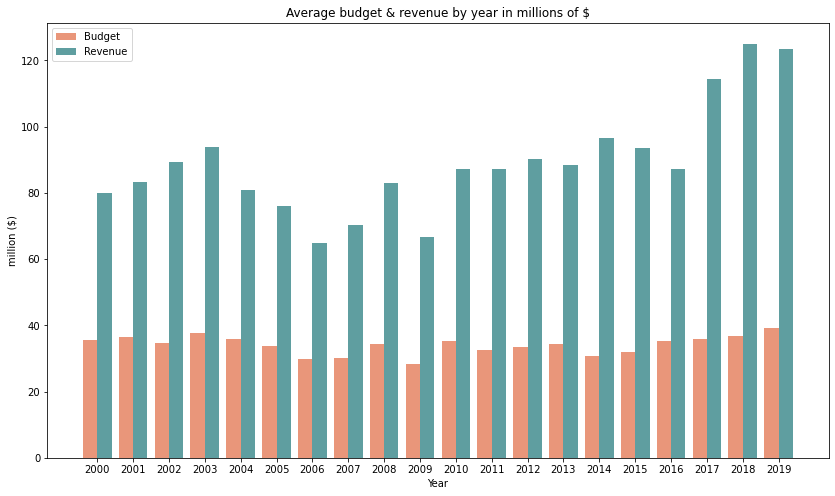

In [55]:
outliers_removed_year_mean = outliers_removed.groupby('startYear').mean()

f = plt.figure(figsize=(14, 8))

plt.bar(outliers_removed_year_mean.index.astype('int64'), outliers_removed_year_mean.budget / 1e6,
        color='darksalmon', width=-0.4, align='edge', label='Budget')
plt.bar(outliers_removed_year_mean.index.astype('int64'), outliers_removed_year_mean.revenue/ 1e6,
        color='cadetblue', width=0.4, align='edge', label='Revenue')

plt.xticks(ticks=outliers_removed_year_mean.index.astype('int64'), labels=outliers_removed_year_mean.index.astype('int64'))
plt.ticklabel_format(style='plain', useOffset=False, axis='y')



plt.xlabel('Year')
plt.ylabel('million ($)')
plt.title('Average budget & revenue by year in millions of $')

plt.legend()
plt.show()

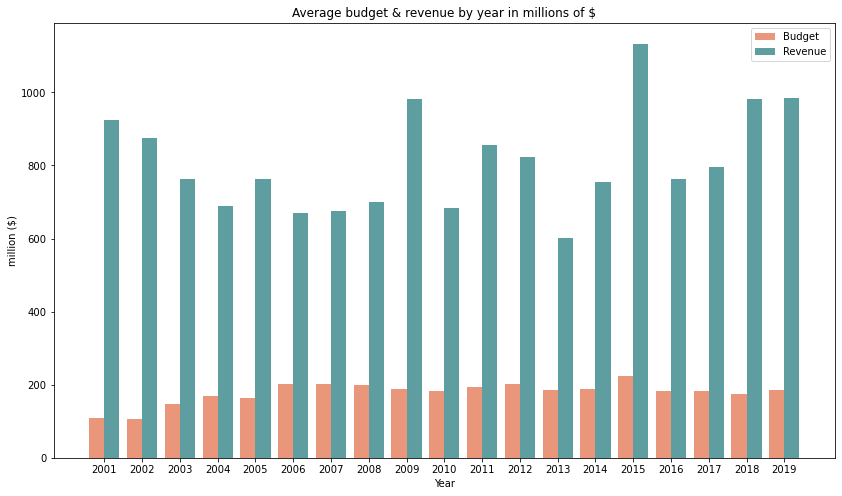

In [56]:
outliers_year_mean = outliers.groupby('startYear').mean()

f = plt.figure(figsize=(14, 8))

plt.bar(outliers_year_mean.index.astype('int64'), outliers_year_mean.budget / 1e6,
        color='darksalmon', width=-0.4, align='edge', label='Budget')
plt.bar(outliers_year_mean.index.astype('int64'), outliers_year_mean.revenue/ 1e6,
        color='cadetblue', width=0.4, align='edge', label='Revenue')

plt.xticks(ticks=outliers_year_mean.index.astype('int64'), labels=outliers_year_mean.index.astype('int64'))
plt.ticklabel_format(style='plain', useOffset=False, axis='y')



plt.xlabel('Year')
plt.ylabel('million ($)')
plt.title('Average budget & revenue by year in millions of $')

plt.legend()
plt.show()

Text(0.5, 1.0, 'Average ROI for the year 2000-2019 for outliers')

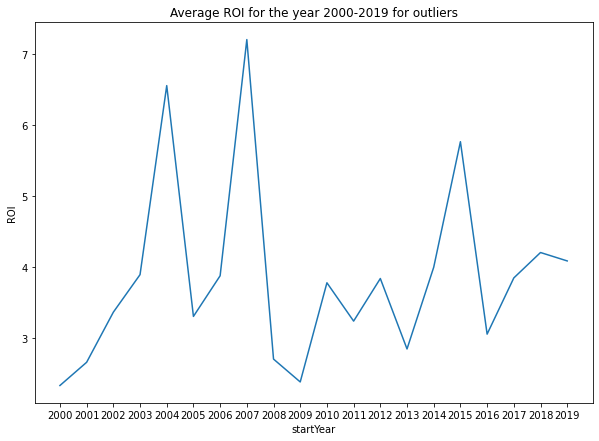

In [115]:
# outliers_removed['date'] = pd.to_datetime(outliers_removed['startYear'], format = '%Y')
fig = plt.gcf()
fig.set_size_inches(10, 7)

 
g = sns.lineplot(data=outliers_removed.groupby("startYear")["ROI"].mean())
g.set_xticks(outliers_removed.groupby("startYear").mean().index)
g.set_title('Average ROI for the year 2000-2019 for outliers')


Text(0.5, 1.0, 'Average ROI for the year 2000-2019 for outliers')

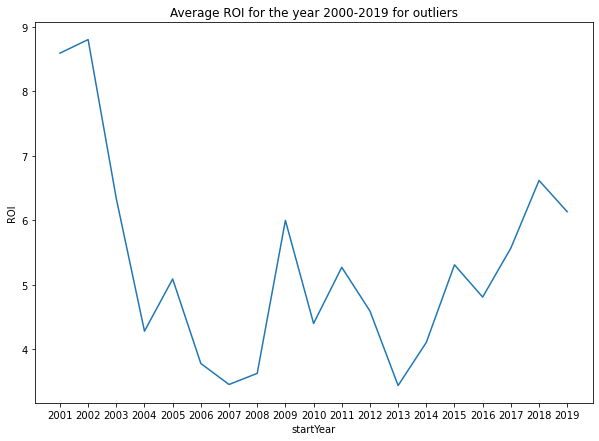

In [113]:
# df.groupby("startYear")["ROI"].mean()
fig = plt.gcf()
fig.set_size_inches(10, 7)

 
g = sns.lineplot(data=outliers.groupby("startYear")["ROI"].mean())
g.set_xticks(outliers.groupby("startYear").mean().index)
g.set_title('Average ROI for the year 2000-2019 for outliers')


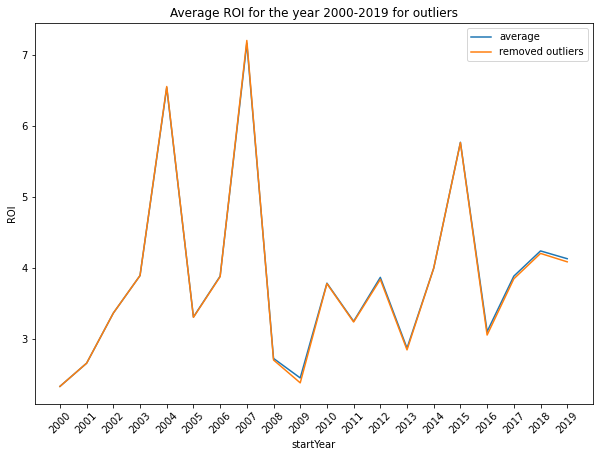

In [127]:
# df['date'] = pd.to_datetime(df['startYear'], format = '%Y')
fig = plt.gcf()


fig.set_size_inches(10, 7)
g = sns.lineplot(data=df.groupby("startYear")["ROI"].mean(), label='average')
g.set_xticks(df.groupby("startYear").mean().index)
g.set_title('Average ROI for the year 2000-2019')

g = sns.lineplot(data=outliers_removed.groupby("startYear")["ROI"].mean(), label='removed outliers')
g.set_xticks(outliers_removed.groupby("startYear").mean().index)
g.set_title('Average ROI for the year 2000-2019 for outliers')

plt.tick_params(axis='x', rotation=45)


In [7]:
genre = df.assign(genres_sep=df['genres'].str.split(',')).explode('genres_sep')
genre.head()

,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,tmdb_id,og_language,budget,revenue,ratio,ROI,averageRating,numVotes,Unnamed: 18,genres_sep
0,7363,tt1179904,movie,Paranormal Activity,Paranormal Activity,0,2007,NaN,86,"Horror,Mystery",23827,en,230000,194183034,0.001184,844.274061,6.3,238846,Info says budget is $15k,Horror
0,7363,tt1179904,movie,Paranormal Activity,Paranormal Activity,0,2007,NaN,86,"Horror,Mystery",23827,en,230000,194183034,0.001184,844.274061,6.3,238846,Info says budget is $15k,Mystery
1,4135,tt0390521,movie,Super Size Me,Super Size Me,0,2004,NaN,100,Documentary,9372,en,65000,28575078,0.002275,439.616585,7.2,108792,NaN,Documentary
2,4907,tt2309260,movie,The Gallows,The Gallows,0,2015,NaN,81,"Horror,Mystery,Thriller",299245,en,100000,42664410,0.002344,426.644100,4.2,20611,NaN,Horror
2,4907,tt2309260,movie,The Gallows,The Gallows,0,2015,NaN,81,"Horror,Mystery,Thriller",299245,en,100000,42664410,0.002344,426.644100,4.2,20611,NaN,Mystery


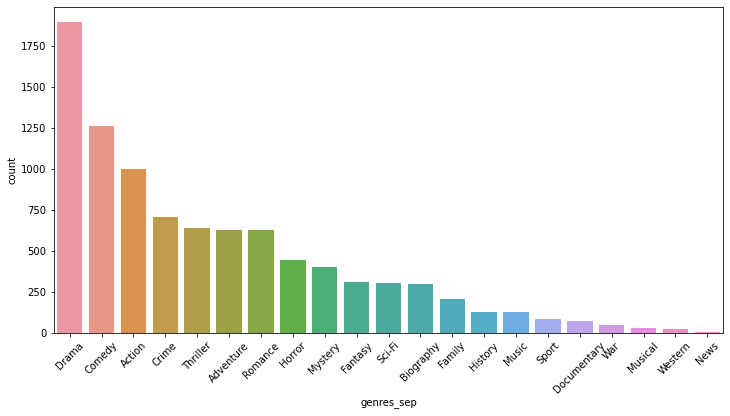

In [8]:
plt.figure(figsize=(12, 6))

sns.countplot(data=genre, x='genres_sep', order=genre.genres_sep.value_counts().index)

plt.tick_params(axis='x', rotation=45)

plt.show()

In [9]:
genre.head()

,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,tmdb_id,og_language,budget,revenue,ratio,ROI,averageRating,numVotes,Unnamed: 18,genres_sep
0,7363,tt1179904,movie,Paranormal Activity,Paranormal Activity,0,2007,NaN,86,"Horror,Mystery",23827,en,230000,194183034,0.001184,844.274061,6.3,238846,Info says budget is $15k,Horror
0,7363,tt1179904,movie,Paranormal Activity,Paranormal Activity,0,2007,NaN,86,"Horror,Mystery",23827,en,230000,194183034,0.001184,844.274061,6.3,238846,Info says budget is $15k,Mystery
1,4135,tt0390521,movie,Super Size Me,Super Size Me,0,2004,NaN,100,Documentary,9372,en,65000,28575078,0.002275,439.616585,7.2,108792,NaN,Documentary
2,4907,tt2309260,movie,The Gallows,The Gallows,0,2015,NaN,81,"Horror,Mystery,Thriller",299245,en,100000,42664410,0.002344,426.644100,4.2,20611,NaN,Horror
2,4907,tt2309260,movie,The Gallows,The Gallows,0,2015,NaN,81,"Horror,Mystery,Thriller",299245,en,100000,42664410,0.002344,426.644100,4.2,20611,NaN,Mystery


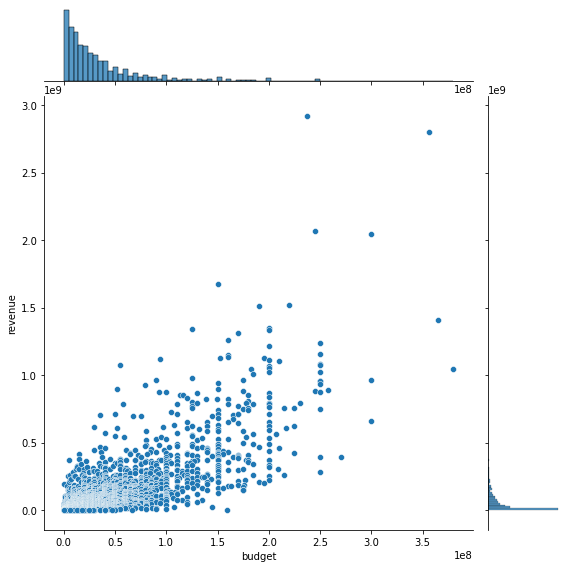

In [10]:
sns.jointplot(data=df, x="budget", y="revenue", height=8)

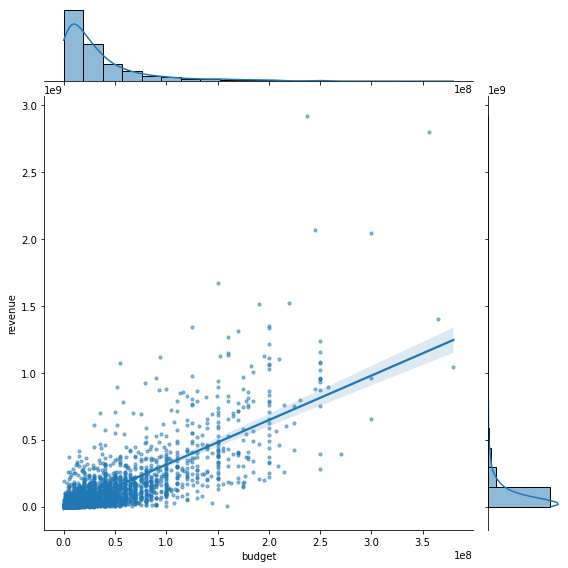

slope=3.3279458523180265, intercept=-19636470.07692662, r_value=0.7684172646923279, p_value=0.0, std_err=0.04628923678179598


In [11]:
f = sns.jointplot(data=df, x='budget', y='revenue', kind='reg',
                  height=8, marginal_kws=dict(bins=20),
                  joint_kws={'scatter_kws':dict(alpha=0.5, s=10)})


slope, intercept, r_value, p_value, std_err = stats.linregress(df['budget'], df['revenue'])

plt.show()

print(f'slope={slope}, intercept={intercept}, r_value={r_value}, p_value={p_value}, std_err={std_err}')

In [12]:
# from wordcloud import WordCloud

In [13]:
# df_title_year = df.groupby("startYear").primaryTitle.apply(list)
# df_title_year.index

# for i in df_title_year.index:
#     print(df_title_year[i])

In [14]:
# title_text = " ".join(df.primaryTitle.values)

In [15]:
# for i in df_title_year.index:
#     title_text = " ".join(df_title_year[i])
#     print(i)
     
#     text = title_text
#     wordcloud = WordCloud().generate(text)

#     # Display the generated image:
#     # the matplotlib way:
#     import matplotlib.pyplot as plt


#     # take relative word frequencies into account, lower max_font_size
#     wordcloud = WordCloud(background_color="white",max_words=len(title_text),max_font_size=40, relative_scaling=.5).generate(text)
#     plt.figure()
#     plt.imshow(wordcloud)
#     plt.axis("off")
#     plt.show()

In [126]:
df.ROI.describe()

count    3587.000000
mean        3.868430
std        19.240664
min         0.000005
25%         0.589215
50%         1.718920
75%         3.486077
max       844.274061
Name: ROI, dtype: float64